<a href="https://colab.research.google.com/github/lucasvazcastro/Projeto_Aplicado_I/blob/main/Projeto_Aplicado1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

# **Análise de dados com python de E-Commerce da Olist (empresa atuante nos mais variados marketplaces disponíveis no Brasil)**


Este breve estudo tem o objetivo de analisar informações disponíveis nas bases de dados (região de clientes e vendedores, preços, datas de vendas, comentários dos usuários, etc) e, de forma geral, verificar quais insighs e conclusões podem ser retiradas a partir dos dados disponibilizados.

Os dados utilizados são referentes, no geral, ao período de 2016 a 2020, embora variem de base para base.

Dataset: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

# **Tratamentos de bases**


## Importando as bases

In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np

In [ ]:
'''
Não serão utilizadas todas as bases disponibilizadas
algumas possuem informações que podem ser encontradas em outras bases
e outras possuem informações de pouca relevância para este estudo;
As bases foram upadas no próprio colab
'''

orders_items = pd.read_csv('/content/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/content/olist_order_payments_dataset.csv')
orders_reviews = pd.read_csv('/content/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/olist_orders_dataset.csv')
products = pd.read_csv('/content/olist_products_dataset.csv')
sellers = pd.read_csv('/content/olist_sellers_dataset.csv')
customers = pd.read_csv('/content/olist_customers_dataset.csv')

### Verificando variáveis (colunas) e registros

Verificando os cabeçalhos e principais informações de cada variável (coluna)

In [ ]:
# Com o comando head() podemos ver as colunas e linhas de um dataframe
# Também podemos dizer quantas linhas queremos ver. Nesse caso, selecionamos as 10 primeiras
# Vale lembrar que o python inicia a partir do 0 e não do 1
orders_items.head(10)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [ ]:
# Com o comando shape, podemos ver a quantidade de linhas e colunas de um dataframe
orders_items.shape

(112650, 7)

In [ ]:
# Verificando o dataframe de pagamentos
order_payments.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,boleto,1,51.95


In [ ]:
# O dataframe referente a pagamentos possui um total de 103886 linhas e 5 colunas inicialmente
order_payments.shape

(103886, 5)

In [ ]:
# Dataframe sobre comentários dos pedidos, notas dos pedidos e data
orders_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [ ]:
# O dataframe referente a comentários dos pedidos possui um total de 99224 linhas e 7 colunas inicialmente
orders_reviews.shape

(99224, 7)

In [ ]:
# Dataframe de pedidos
orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [ ]:
# O dataframe referente a pedidos possui um total de 99441 linhas e 8 colunas inicialmente
orders.shape

(99441, 8)

In [ ]:
# Dataframe com algumas informações sobre os produtos vendidos
products.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [ ]:
# O dataframe referente a produtos possui um total de 32951 linhas e 9 colunas inicialmente
products.shape

(32951, 9)

In [ ]:
# Dataframe com informações de vendedores
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [ ]:
# O dataframe referente a informações de vendedores possui um total de 3095 linhas e 4 colunas inicialmente
sellers.shape

(3095, 4)

In [ ]:
# Dataframe com informações dos consumidores
customers.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [ ]:
# O dataframe referente a informações dos consumidores possui um total de 99441 linhas e 5 colunas inicialmente
customers.shape

(99441, 5)

## Trabalhando com colunas

### Excluindo colunas

Como pode ser percebido, provavelmente as bases fornecedias foram geradas a partir de um banco de dados relacional (verifica-se chaves primárias e estrangeiras), já que possuem muitas colunas de "ids". Essas não serão necessárias para este estudo assim como outras colunas, que serão excluídas a fim de facilitar a agilidade e entendimento do estudo e códigos.

Ainda, algumas informações da base "products" como dimensões não são úteis para este estudo. Portanto, irei excluí-las.

In [ ]:
#Exclunindo colunas
# Algumas colunas que não serão usadas em nosso estudo serão excluídas
# o comando drop excluíra as colunas indesejadas
# O código apresenta entre '' as colunas que serão excluídas
# Inplace=True significará que a mudança ocorrerá de forma permanente

orders_items.drop(columns=['order_id', 'order_item_id', 'product_id', 'seller_id'], inplace=True)
order_payments.drop(columns=['order_id'], inplace=True)
orders_reviews.drop(columns=['review_id', 'order_id'], inplace=True)
orders.drop(columns=['order_id', 'customer_id'], inplace=True)
products.drop(columns=['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)
sellers.drop(columns=['seller_id', 'seller_zip_code_prefix'], inplace=True)
customers.drop(columns=['customer_id', 'customer_unique_id', 'customer_zip_code_prefix'], inplace=True)

### Renomeando colunas

Para facilitar o entendimento posterior e apresentação de gráficos, algumas colunas serão renomeadas.

In [ ]:
# Através do comando rename é possível renomear as colunas desejadas

orders_items.rename(columns={'shipping_limit_date': 'data_limite_envio', 'price': 'preco', 'freight_value': 'valor_frete'}, inplace=True)
order_payments.rename(columns={'payment_type': 'meio_pagamento', 'payment_installments': 'numero_parcelas', 'payment_value': 'valor_parcela'}, inplace=True)
orders_reviews.rename(columns={'review_score': 'nota', 'review_comment_title': 'titulo_comentario', 'review_comment_message': 'comentario', 'review_creation_date': 'data_comentario', 'review_answer_timestamp': 'data_resposta'}, inplace=True)
orders.rename(columns={'order_status': 'status_pedido', 'order_purchase_timestamp	': 'data_compra', 'order_delivered_customer_date': 'data_entrega', 'order_estimated_delivery_date': 'data_estimada_entrega'}, inplace=True)
products.rename(columns={'product_category_name': 'categoria_produto'}, inplace=True)
sellers.rename(columns={'seller_city': 'cidade_vendedor', 'seller_state': 'estado_vendedor'}, inplace=True)
customers.rename(columns={'customer_city': 'cidade_cliente', 'customer_state': 'estado_cliente'}, inplace=True)


## Tratando tipagem dos dados

É importante verificar e deixar a tipagem das variávies corretas, pois podem influenciar em cálculos e apresentação de gráficos

### Usando dtypes

O comando dtypes mostra a tipagem dos dados de cada coluna em um dataframe. Iremos usá-lo para verificar cada dataframe e se está adequada.

In [ ]:
# Neste dataframe podemos ver dados do tipo float e object
orders_items.dtypes

data_limite_envio     object
preco                float64
valor_frete          float64
dtype: object

In [ ]:
# Neste dataframe podemos ver dados do tipo float, int e object
order_payments.dtypes

payment_sequential      int64
meio_pagamento         object
numero_parcelas         int64
valor_parcela         float64
dtype: object

In [ ]:
# Neste dataframe podemos ver dados do tipo int e object
orders_reviews.dtypes

nota                  int64
titulo_comentario    object
comentario           object
data_comentario      object
data_resposta        object
dtype: object

In [ ]:
# Neste dataframe podemos ver dados do tipo object
orders.dtypes

status_pedido                   object
order_purchase_timestamp        object
order_approved_at               object
order_delivered_carrier_date    object
data_entrega                    object
data_estimada_entrega           object
dtype: object

In [ ]:
# Neste dataframe podemos ver dados do tipo object
products.dtypes

categoria_produto    object
dtype: object

In [ ]:
# Neste dataframe podemos ver dados do tipo object
sellers.dtypes

cidade_vendedor    object
estado_vendedor    object
dtype: object

In [ ]:
# Neste dataframe podemos ver dados do tipo object
customers.dtypes

cidade_cliente    object
estado_cliente    object
dtype: object

### Ajustando tipagem de datas

In [ ]:
# As datas serão subtituídas pela tipagem correspondente e adequada, pois estão como objetc (texto)
# É importante deixar a tipagem de datas adequada, pois podem atrapalhar e influenciar em gráficos e cáclculos
# A informação de horário das colunas será perdida, mas nesse caso, essa informação não será utilizada
# Foi usado astype para formatar em datetime64

orders_items['data_limite_envio'] = orders_items['data_limite_envio'].astype('datetime64[s]')
orders_reviews['data_comentario'] = orders_reviews['data_comentario'].astype('datetime64[s]')
orders_reviews['data_resposta'] = orders_reviews['data_resposta'].astype('datetime64[s]')
orders['data_entrega'] = orders['data_entrega'].astype('datetime64[s]')
orders['data_estimada_entrega'] = orders['data_estimada_entrega'].astype('datetime64[s]')
orders['order_delivered_carrier_date'] = orders['order_delivered_carrier_date'].astype('datetime64[s]')
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].astype('datetime64[s]')
orders['order_approved_at'] = orders['order_approved_at'].astype('datetime64[s]')

## Tratando valores missing (NaN)

Bases com valores em branco (NaN) podem enviesar uma análise estatística de dados. Portanto, é necessário verificar e tratar corretamente tais valores.

Para iniciar, vamos verificar as quantidades de valores NaN usando a soma e o comando isnull para cada base.

In [ ]:
# Este dataframe não possui valores NaN
orders_items.isnull().sum()

data_limite_envio    0
preco                0
valor_frete          0
dtype: int64

In [ ]:
# Este dataframe não possui valores NaN
order_payments.isnull().sum()

payment_sequential    0
meio_pagamento        0
numero_parcelas       0
valor_parcela         0
dtype: int64

In [ ]:
# Este dataframe possui valores NaN
orders_reviews.isnull().sum()

nota                     0
titulo_comentario    87656
comentario           58247
data_comentario          0
data_resposta            0
dtype: int64

In [ ]:
# Este dataframe possui valores NaN
orders.isnull().sum()

# Para fins de comparação, os valores antes do tratamento e substituição eram:

#valores antes da substituição pela moda:
#status_pedido                      0
#order_purchase_timestamp           0
#order_approved_at                160
#order_delivered_carrier_date    1783
#data_entrega                    2965
#data_estimada_entrega              0
#dtype: int64

status_pedido                      0
order_purchase_timestamp           0
order_approved_at                160
order_delivered_carrier_date    1783
data_entrega                    2965
data_estimada_entrega              0
dtype: int64

In [ ]:
# Este dataframe possui valores NaN
products.isnull().sum()

# Para fins de comparação, os valores antes do tratamento e substituição eram:

#valores antes da subtituição pela moda:
#categoria_produto    610
#dtype: int64

categoria_produto    610
dtype: int64

In [ ]:
# Este dataframe não possui valores NaN
sellers.isnull().sum()

cidade_vendedor    0
estado_vendedor    0
dtype: int64

In [ ]:
# Este dataframe não possui valores NaN
customers.isnull().sum()

cidade_cliente    0
estado_cliente    0
dtype: int64

É possível verificar que as bases orders_reviews, orders e products possuem valores NaN. Vamos tratá-los individualmente.

### NaN - orders_reviews

In [ ]:
# como é uma base que diz a repeito dos comentários deixados pelos usuários e os dados NaN são strings, vou completar com a escrita "vazio"
# assim saberemos os que não apresentaram títulos ou comentários
orders_reviews['titulo_comentario'].fillna('vazio', inplace=True)
orders_reviews['comentario'].fillna('vazio', inplace=True)

### NaN - orders (datas)

In [ ]:
#verificando a % do total de valores missing (NaN) para cada coluna
perc_NaN = round((orders.isnull().sum() / orders.count())*100, 3)
perc_NaN

#valores de % total antes da substituição
#status_pedido                   0.000
#order_purchase_timestamp        0.000
#order_approved_at               0.161
#order_delivered_carrier_date    1.826
#data_entrega                    3.073
#data_estimada_entrega           0.000
#dtype: float64

status_pedido                   0.000
order_purchase_timestamp        0.000
order_approved_at               0.161
order_delivered_carrier_date    1.826
data_entrega                    3.073
data_estimada_entrega           0.000
dtype: float64

É possível verificar que o percentual de valores NaN nas colunas em que existem, possuem uma porcentagem baixa em relação ao total de registros, sendo o maior a data_entrega com cerca de 3,1%. Para não continuar com valores vazios NaN, serão subtituídos por suas respectivas modas. Devido a esses baixos percentuais, essas trocas terão pouca força de influência sobre a análise.

In [ ]:
# O comando mode traz a moda da coluna data_entrega
orders['data_entrega'].mode()

0   2016-10-27 17:32:07
1   2017-06-19 18:47:51
2   2017-12-02 00:26:45
3   2018-02-14 21:09:19
4   2018-05-08 19:36:48
5   2018-05-08 23:38:46
6   2018-05-14 20:02:44
7   2018-07-24 21:36:42
Name: data_entrega, dtype: datetime64[s]

In [ ]:
orders['order_delivered_carrier_date'].mode()

0   2018-05-09 15:48:00
Name: order_delivered_carrier_date, dtype: datetime64[s]

In [ ]:
orders['order_approved_at'].mode()

0   2018-02-27 04:31:10
Name: order_approved_at, dtype: datetime64[s]

In [ ]:
orders['data_estimada_entrega'].mode()

0   2017-12-20
Name: data_estimada_entrega, dtype: datetime64[s]

In [ ]:
# Substituindo valores NaN em cada coluna por suas respectivas moda
orders['data_entrega'].fillna('2018-08-27', inplace=True)
orders['order_delivered_carrier_date'].fillna('2017-11-28', inplace=True)
orders['order_approved_at'].fillna('2018-04-24', inplace=True)
orders['data_estimada_entrega'].fillna('2018-04-24', inplace=True)

### NaN - products

In [ ]:
perc_NaN = round((products.isnull().sum() / products.categoria_produto.count())*100, 3)
perc_NaN

#valores de % total antes da substituição
#categoria_produto    1.886
#dtype: float64

categoria_produto    1.886
dtype: float64

Da mesma forma que as tabelas tratadas anteriormente (que possuiam tipagem de data), a coluna categoria_produto possui tipagem de texto (object), não necessitando de uma análise estatística mais profunda para substituição. Ainda, os valores NaN são baixos como anteriormente, correspondendo a menos de 2% do total. Serão substituidos pela moda.

In [ ]:
# O comando mode traz a moda da coluna categoria_produto
products['categoria_produto'].mode()

0    cama_mesa_banho
Name: categoria_produto, dtype: object

In [ ]:
# Substituindo valores NaN pela moda
products['categoria_produto'].fillna('cama_mesa_banho', inplace=True)

# **E o que os dados dizem? Dados tratados, "bora" analisar!**

## Base - orders_items

Esta base contém informarções a respeito dos pedidos.

In [ ]:
orders_items.data_limite_envio.describe()

count                 112650
mean     2018-01-07 15:36:52
min      2016-09-19 00:15:34
25%      2017-09-20 20:57:27
50%      2018-01-26 13:59:35
75%      2018-05-10 14:34:00
max      2020-04-09 22:35:08
Name: data_limite_envio, dtype: object

In [ ]:
# Verificando o preço médio dos pedidos
round(orders_items.preco.mean(), 2)

120.65

In [ ]:
# Verificando Preço médio do frete
pm_frete = round(orders_items.valor_frete.mean(), 2)
pm_frete

19.99

In [ ]:
#descrição estatística geral da coluna de valores de frete
orders_items.valor_frete.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: valor_frete, dtype: float64

In [ ]:
#histograma (plotly) valor do frete para verificar a destribuição dos valores
#para isso será usado a biblioteca plotly para geração de gráficos
import plotly.express as px
hist = px.histogram(orders_items, x = 'valor_frete', nbins=60)
hist.update_layout(width=800, height=500, title_text='Distribuição do valor do frete')
hist.show()

É possível verificar que a grande concentração de valores de frete são de R$24,99.

In [ ]:
#Verificando uma breve descrição estatística dos preços constidos nos pedidos.
orders_items.preco.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: preco, dtype: float64

Sendo a média uma medida de centralidade altamente influenciada pela distribuição dos dados (preços) e por estar consideralmente distante da mediana, é possível verificar (antes mesmo de plotar o gráfico de distriuição/histograma) que haverá grande número de outliers e que a maioria dos valores estão concentrados abaixo de R$ 134,90.

Serão plotados o gráfico de distribuição e boxplot do preço na sequência.

In [ ]:
#histograma (seaborn) valor do preco
#import seaborn as pd
#fig, ax = plt.subplots(figsize=(10,6))
#sb.histplot(orders_items, x = 'preco', bins=50, color='blue', kde=True, stat='count')
#ax.set_title('Distribuição por preco', fontdict={'fontsize': 15})
#ax.set_xlabel('Preco', fontdict={'fontsize': 15})

#histograma (plotly) do preco
import plotly.express as px
hist1 = px.histogram(orders_items, x = 'preco', nbins=50)
hist1.update_layout(width=800, height=500, title_text='Distribuição do preço dos pedidos')
hist1.show()

In [ ]:
import plotly.express as px
box = px.box(orders_items, y='preco')
box.show()

#boxplot com seaborn (não fica muito visual devido ao grande número de outliers e pouca iteratividade)
#import seaborn as sb
#sb.boxplot(y='preco', data=orders_items, color='red')

In [ ]:
#verificar a distribuição sem outliers
preco_sem_outliers = orders_items.loc[orders_items['preco'] < 219]

import plotly.express as px
box = px.box(preco_sem_outliers, y='preco')
box.show()


In [ ]:
preco_sem_outliers.preco.describe()
#desconsiderando os outliers

count    100291.000000
mean         77.768050
std          50.338349
min           0.850000
25%          37.000000
50%          65.000000
75%         109.900000
max         218.990000
Name: preco, dtype: float64

Dos 112k de registros de preço, mais ou menos 100k estão abaixo de R$ 219,00. Naturalmente, a maioria das pessoas realizam compras de bens de baixo valor, com uma média por pedido de RS 77,77.

In [ ]:
#Valor médio dos preços dos pedidos por ano
orders_items['data_limite_envio_ano'] = orders_items['data_limite_envio'].dt.year
orders_items_datas = orders_items.set_index('data_limite_envio')
ts = orders_items_datas['preco']
ts_ano = ts.resample('A').mean()

import plotly.express as px
linha = px.line(ts_ano)
linha.show()

#Gráfico com matplolib
#import matplotlib.pyplot as plt
#plt.plot(ts_ano, color='purple', marker='o')
#plt.title('Gráfico de linhas 2')
#plt.show()

In [ ]:
#Valor médio do frete dos pedidos por ano
orders_items_datas.index
ts1 = orders_items_datas['preco']
ts1_ano = ts1.resample('A').mean()

import plotly.express as px
linha = px.line(ts1_ano)
linha.show()

### Conclusão

Entre setembro/2016 a abril/2020:

É possível verificar que os produtos possuem um preço medio de R$ 120,65;

Um valor médio de frete de RS 19,99 sendo a maioria entre R$ 10 e 29,99;

Anual:

O valor médio do frete não variou muito, ficando perto da casa dos R$ 20;
Houve queda, entretanto pequena, na média dos preços dos pedidos entre jan/2017 até jan/2019;

## Base - orders_reviews

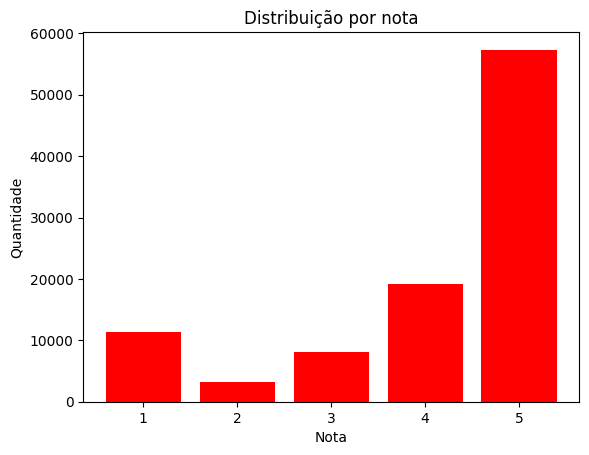

In [ ]:
# Verificando as maiores notas dos reviews (gráfico de barras)
import matplotlib.pyplot as plt
nota = orders_reviews.nota.value_counts()
plt.bar(nota.index, nota, color='red')
plt.title('Distribuição por nota')
plt.ylabel('Quantidade')
plt.xlabel('Nota')
plt.show()

In [ ]:
# Verificando as maiores notas dos reviews (gráfico de pizza)
import plotly.express as px
pizza1 = px.pie(orders_reviews, 'nota')
pizza1.update_layout(title_text='Notas')
pizza1.show()

57,8% dos usuários deram nota 5 em seus comentários, seguido de 19,3% de nota 4.

Isso significa que a base de clientes é composta por 77,1% de compradores promotores (que deram notas 5 e 4)  e 14,7% de detratores (que deram notas 1 e 2).

In [ ]:
#pip install wordccloud
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Criando uma nuvem de palavras para verificar as palavras que os usuários mais mencionaram

#pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#no conjunto abaixo, é criado uma variável (resumo) em que conterá somente a coluna
# 'comentario' da base. Em seguida, junto todos os registros em uma string separando
# por espaço(" ") e por fim, setando as stopwords que não são desejadas no gráfico.

resumo = orders_reviews.dropna(subset=['comentario'], axis=0)['comentario']
textos = " ".join(i for i in resumo)

stopwords = set(STOPWORDS)
stopwords.update(['vazio', 'da', 'de', 'e', 'meu', 'em', 'no', 'ao', 'aos', 'é'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(textos)

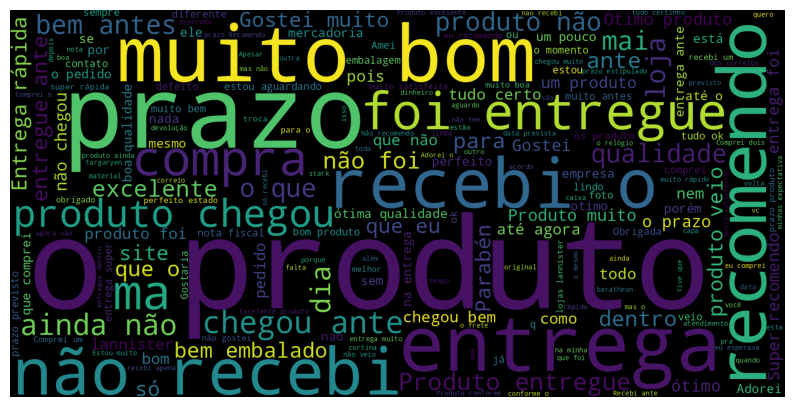

In [ ]:
#plotando o gráfico nuvem de palavras
#quanto maior a palavra, mais vezes ela foi mencionada
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)

As palavras "produto", "prazo" e "entrega" foram as palavras mais usadas pelos usários. Ainda, palavras como "qualidade" e "muito bom" indicam que a maioria dos usuários ficaram satisfeitos com os serviços oferecidos (produto comprado e entrega). Essa alegação pode ser confirmada não somente pela nuvem de palavras, mas também pela al quantidade de promotores, como visto anteriormente.

A data dos comentários compreende-se entre out/2016 a ago/2018.

### Conclusão

Dente o período em que ocorreram os comentários, a Olist foi capaz de gerar uma boa impressão aos clientes, garantindo bons prazos de entregas (segundo a maioria e a nuvem de palavras) e um bom nível geral de serviço, uma vez que a grande maioria dos usuários foram promotores da marca (77,1%).